# 2. Mathematical Background

This chapter discusses the essential mathematics for Reinforcement Learning and Data Science. Jumping directly into coding RL agents without strong mathematical background is never recommended.

While there are multiple definitions for Data Science (and Reinforcement Learning) from several perspectives like Software Engineer, Machine Learning Scientist, the core concept of <span class = 'high'>Uncertainty</span> remains common.

We choose to learn from data because we believe that the latent information is embedded in the data — unprocessed, contains noise, and could have missing entries. If there is no randomness, all data scientists can close their business because there is simply no problem to solve. Therefore, data science is the subject of making decisions in uncertainty.

```{admonition} Note
:class: tip
See [Multi-Arm Bandit Chapter](../multi-arm-bandit/mab-explained.md) for details about "Decision making under Uncertainty"
```

The mathematics of analyzing uncertainty is <span class = 'high'>Probability.</span> It is the tool to help us model, analyze, and predict random events. Probability is a vast topic and certainly deserves it's own chapter in this book. (See table of contents).

The topics in this chapter are meant to review familiar concepts of undergraduate algebra and calculus. These topics are meant to warm up your mathematics background so that you can follow the subsequent chapters. This chapter starts with details about [Infinite Series](MAB_Intro.md), something that will be used frequently to evaluate the expectation and variance of random variables. Next we move on to [Taylor Approximation](MAB_Intro.md), which will be helpful when we discuss continuous random variables. The next section deals with review of integration alongside providing several tricks to make integration easy. The last two sections of the chapter deal with [Linear Algebra](math_back.md) and details about [Permutations and Combinations](math_back.md), basic techniques to count events.

####  Infinite Series


*Gentle Introduction to Probability*

Imagine that you have a <span class = 'high'>fair coin</span>. If you get a tail, you flip the coin again. You do this repeatedly until you finally get a head. <span class = 'high'>What is the probability that you need to flip the coin three times to get one head?</span>

This is a warm-up exercise. Since the coin is fair, the probability of obtaining a head is $\frac{1}{2}$. The probability of getting a tail followed by a head is $\frac{1}{2} \times \frac{1}{2} = \frac{1}{4}$. If you follow this logic, you can write down the probabilities for all other cases. The below figures shows these probabilities for better understanding.

![test](../images/coins.png)

We can also summarize these probabilities using <span class = 'high'>Histogram</span> as shown below. We see that the sequence above can be infinitely long.

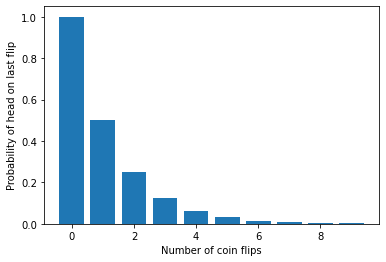

In [1]:
import numpy as np
import matplotlib.pyplot as plt
p = 1/2
n = np.arange(0,10)
X = np.power(p,n)
plt.bar(n,X)
plt.xlabel("Number of coin flips")
plt.ylabel("Probability of head on last flip")
plt.show()

Another question that can be asked based on the above experiment is, <span class = 'high'>On average, if you want to be $90\%$ sure that you will get a head, what is the minimum number of attempts you need to try?</span>

This problem can be answered by analyzing the sequence of probabilities. If we make two attempts, then the probability of getting a head is the sum of the probabilities for one attempt and that of two attempts:

$$
\begin{align}
\mathbb{P}[\text{success after 1 attempt}] &= \frac{1}{2} = 0.5 \\
\mathbb{P}[\text{success after 2 attempts}] &= \frac{1}{2} + \frac{1}{4}= 0.75 \\
\mathbb{P}[\text{success after 3 attempts}] &= \frac{1}{2} + \frac{1}{4} + \frac{1}{8} = 0.875 \\
\mathbb{P}[\text{success after 4 attempts}] &= \frac{1}{2} + \frac{1}{4} + \frac{1}{8} + \frac{1}{16}= 0.9375
\end{align}
$$

This means if we try for 4 attempts we will have $93.75 \%$ probability to obtain a head.

This section is a gentle introduction to calculation of probability without formulae. Probability will be reviewed in detail in the next chapter.


#### Geometric Series

A geometric series is the sum of a finite or an infinite sequence of numbers with a constant ratio between successive terms. As we have seen in the previous example, a geometric series appears naturally in the context of discrete events. In <span class = 'high'>chapter</span>, we will use geometric series when calculating <span class = 'high'>expectation</span> and <span class = 'high'>moments</span> of a random variable.

```{admonition} Geometric Series
:class: note
<span class = 'high'>Finite Geometric Sequence</span> of power $n \enspace \rightarrow \enspace \{1,r,r^2,...,r^n\}$

<span class = 'high'>Infinite Geometric Sequence</span> of numbers $\enspace \rightarrow \enspace \{1,r,r^2,...\}$
```

```{admonition} Sum of geometric series
:class: note
Sum of a finite geometric series of power $n$ is:


$$\sum_{k=0}^n r^k = 1+r+r^2+...+r^n = \frac{1-r^{n+1}}{1-r} \label{naresh}$$

Sum of an infinite geometric series is (if $0 < r < 1$):


```{math}
    \sum_{k=0}^\infty r^k = 1+r+r^2+... = \frac{1}{1-r}
```

$$\sum_{k=1}^{\infty}k r^{k-1} = 1+2r+3r^2+... = \frac{1}{(1-r)^2}$$
:::{seealso}
$$
\sum_{n=1}^\infty \frac{1}{2^k} = \frac{1}{4}(1+\frac{1}{2}+\frac{1}{4}...) = \frac{1}{4}\cdot \frac{1}{1-\frac{1}{2}} = \frac{1}{2}$$

$$\sum_{n=1}^\infty \frac{1}{n^2} = 1+\frac{1}{2^2}+\frac{1}{3^2}+.. = \frac{\pi^2}{6}
$$
:::

#### Binomial Series


A [geometric series](math_back1.md) is useful when handling situations such as $N-1$ failures followed by a success. However, we can easily twist the problem by asking: <span class = 'high'>What is the probability of getting one head out of $3$ independent coin tosses?</span> In this case, the probability can be determined by enumerating all possible cases:

$$
\begin{align}
\mathbb{P}[\text{1 head in 3 coins}] &= \mathbb{P}[H,T,T]+\mathbb{P}[T,H,T]+\mathbb{P}[T,T,H] \\
&= \small{\left(\frac{1}{2}\times \frac{1}{2} \times \frac{1}{2}\right)+\left(\frac{1}{2}\times \frac{1}{2} \times \frac{1}{2}\right)+\left(\frac{1}{2}\times \frac{1}{2} \times \frac{1}{2}\right)} \\
&= \small{\frac{3}{8}}
\end{align}
$$

![test](../images/coins1.png)


In general, the number of combinations can be systematically studied using <span class = 'high'>Combinatorics</span>, which we will discuss later in the chapter. However, the number of combinations motivates us to discuss another background technique known as the <span class = 'high'>Binomial Series</span>. The binomial series is instrumental in algebra when handling polynomials such as $(a+b)^2$ or $(1+x)^3$. It provides valuable formula when computing these powers.

```{admonition} Binomial Theorem
:class: note
For any real numbers $a$ and $b$, the binomial series of power $n$ is:


$$\definecolor{orange}{RGB}{232, 62, 140}
\color{orange}{(a+b)^n = \sum_{k=0}^{n}\binom{n}{k}a^{n-k}b^k}$$

$$
\small{\text{where} \binom{n}{k} = \frac{n!}{k!(n-k)!}}$$
```

In [3]:
from scipy.special import comb, factorial
n=10
k=2
print(comb(n,k))
print(factorial(k))

45.0
2.0


```{admonition} Pascal's Identity
Let $n$ and $k$ be positive integers such that $K \leq n$, then,

$$\binom{n}{k}+\binom{n}{k-1}=\binom{n+1}{k}$$
```

```{dropdown} Exercise 1: Using Binomial theorem find $(1+x)^3$

$$\begin{align}
(1+x)^3 &= \sum_{k=0}^{n}\binom{3}{k}1^{3-k}x^k \\
&= 1+3x+3x^2+x^3
\end{align}$$
```


#### Approximation

Consider a function $f(x) = log(1+x)$, for $x >0$. This is a non-linear function. Non-linear functions are hard to deal with because, for example, if you want to integrate the function $\int_{a}^{b}xlog(1+x)dx$, then the logarithm will force us to do integration by parts. However, in many practical problems, we may not need the full range of $x>0$. Suppose that you are only interested in the values $x << 1$. Then the logarithm can be approximated, and thus the integral can also be approximated

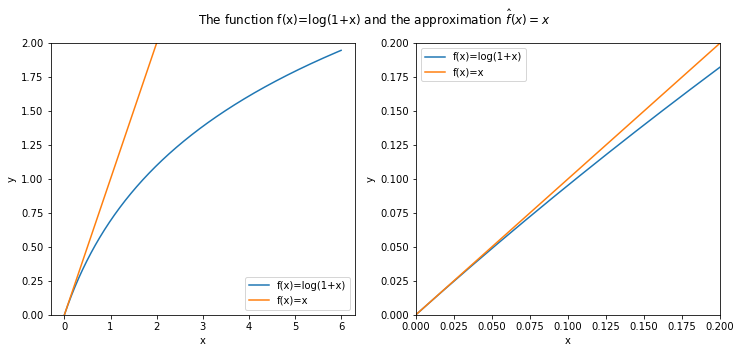

In [22]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,6,1000)
y = np.log(1+x)

fig,(ax1, ax2) = plt.subplots(1, 2,figsize=(12,5))
fig.suptitle('The function f(x)=log(1+x) and the approximation $\hatf(x)=x$')
ax1.plot(x, y,label='f(x)=log(1+x)')
ax1.plot(x,x, label = 'f(x)=x')
ax1.set_ylim([0, 2])
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()

ax2.plot(x, y, label = 'f(x)=log(1+x)')
ax2.plot(x,x, label = 'f(x)=x')
ax2.set_ylim([0, 0.2])
ax2.set_xlim([0, 0.2])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()
plt.show()

To see how this is possible, let's see the above image. The non-linear function $f(x) = log(1+x)$ and an approximation $\hat f(x)=x$ are chosen. The approximation is carefully chosen such that for $x<<1$, the approximation $\hat f(x)$ is close to the true function $f(x)$. Therefore, we can argue that for $x<<1$,

$$log(1+x) \approx x$$

This simplifies the calculation for the integral discussed above. For example, if you want to integrate $xlog(1+x)$ for $0<x<0.1$, then the integral can be approximated by,

$$\int_0^{0.1}xlog(1+x)dx \enspace \approx \int_0^{0.1}x^2dx = \frac{x^3}{3} = 3.33 \times 10^{-4}$$

(The actual integral is $3.21 \times 10^{-4}$). In this section we will learn about the basic approximation techniques.


##### Taylor Approximation

Given a function $f: \mathbb{R} \rightarrow \mathbb{R}$, it is often useful to analyze its behaviour by approximating $f$ using its local information. <span class = 'high'>Taylor approximation</span> is one of the tools for such a task. We will use the Taylor approximation on many occasions.

```{admonition} Taylor Approximation
Let $f: \mathbb{R} \rightarrow \mathbb{R}$ be a continuous function with infinite derivatives. Let $a \in \mathbb{R}$ be a fixed constant. The Taylor approximation of $f$ at $x=a$ is

$$
\begin{align}
f(x) &= f(a)+f'(a)(x-a)+\frac{f''(a)}{2!}(x-a)^2+... \\
&= \sum_{n=0}^\infty \frac{f^{(n)}(a)}{n!}(x-a)^n
\end{align}$$
$\small{\text{where }f^{(n)} \text{ denotes the } n^{th} \text{ -order derivative of } f}$
```

Taylor approximation is a geometry-based approximation. It approximated the function according to the offset, slope, curvature, and so on. According to the definition the Taylor series has an infinite number of terms. If we use a finite number of terms, we obtain the $n^{th}$-order Taylor approximation.

$$
\text{First-Order: } f(x) = \underbrace{f(a)}_{\text{offset}}+\underbrace{f'(a)(x-a)}_{\text{slope}}+ \mathcal{O}((x-a)^2)$$

$$\text{Second-Order: } f(x) = \underbrace{f(a)}_{\text{offset}}+\underbrace{f'(a)(x-a)}_{\text{slope}}+ \underbrace{\frac{f''(a)}{2!}(x-a)^2}_{\text{curvature}}+\mathcal{O}((x-a)^3)
$$

Here, the big-O notation $\mathcal{O}(\epsilon^k)$ means any term that has an order at least power $k$. For small $\epsilon$, i.e., $\epsilon ≪ 1$, a high-order term $\mathcal{O}(\epsilon^k) \approx 0$ for large $k$.

:::{seealso}
Let $f(x)=sinx$. Then the Taylor approximation at $x=0$ is

$$
\begin{align}
f(x) &\approx f(0) + f'(0)(x-0)+\frac{f''(0)}{2!}(x-0)^2+\frac{f'''(0)}{3!}(x-0)^3 \\
&= sin(0)+cos(0)(x-0)+\frac{sin(0)}{2!}(x-0)^2+\frac{cos(0)}{3!}(x-0)^3 \\
&= 0+x-0-\frac{x^3}{6} = x-\frac{x^3}{6}
\end{align}$$

We can expand further to higher orders, which yields

$$f(x) = x - \frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!}+...$$

We show the first few approximations in the figure below. One should be reminded that Taylor approximation approximates a function $f(x)$ at a particular point $x=a$. Therefore, the approximation of $f$ near $x=0$ and the approximation of $f$ near $x = \pi/2$ are different. For example, the Taylor approximation at $x = \pi/2$ for $f(x)=sinx$ is

$$
\begin{align}
f(x) &= sin\frac{\pi}{2}+cos\frac{\pi}{2}(x -\frac{\pi}{2}) -\frac{sin\frac{\pi}{2}}{2!}(x -\frac{\pi}{2})^2 - \frac{cos\frac{\pi}{2}}{3!}(x-\frac{\pi}{2})^3 \\
&= 1+0 -\frac{1}{4}(x-\frac{\pi}{2})^2-0=1-\frac{1}{4}(x-\frac{\pi}{2})^2
\end{align}$$

```{image} ../images/taylor_approx1.png
:alt: taylor approximation of sin(x)
:align: center
```

:::

##### Exponential Series
An immediate application of the Taylor approximation is to derive the <span class = 'high'>exponential series.</span>

```{admonition} Theorem
Let $x$ be any real number. Then,

$$e^x = 1+x+\frac{x^2}{2!}+\frac{x^3}{3!}+... = \sum_{k=0}^\infty\frac{x^k}{k!}$$
```
```{dropdown} Exercise 2: Evaluate $\sum_{k=0}^\infty\frac{\lambda^ke^{-\lambda}}{k!}$

$$\sum_{k=0}^\infty\frac{\lambda^ke^{-\lambda}}{k!} = e^{-\lambda}\sum_{k=0}^\infty\frac{\lambda^k}{k!} = e^{-\lambda}e^\lambda = 1$$
```

##### Logarithmic approximation
Taylor approximation also allows us to find approximations to logarithmic functions. We start by finding the approximation of $log(1+x)$:

Let $f(x) = log(1+x)$. Then, the derivatives of $f$ are

$$f'(x) = \frac{1}{(1+x)} \text{, and } f''(x) = -\frac{1}{(1+x)^2}$$

Taylor approximation at $x = 0$ gives

$$
\begin{align}
f(x) &= f(0)+f'(0)(x-0)+\frac{f''(0)}{2}(x-0)^2+\mathcal{O}(x^3) \\
&=log1+(\frac{1}{(1+0)})x - (\frac{1}{(1+0)^2})x^2+\mathcal{O}(x^3) \\
&= x=x^2+\mathcal{O}(x^3)
\end{align}
$$

The difference between this result and the result shown in the beginning of this section is the order of polynomials we used to approximate the logarithm:

* First-Order: $log(1+x) = x$
* Second-Order: $log(1+x) = x-x^2$

What order of approximation is good? It depends on <span class = 'high'>where</span> you want the approximation to be good, and how <span class = 'high'>far</span> you want the approximation to go. The difference between the approximations is shown below.

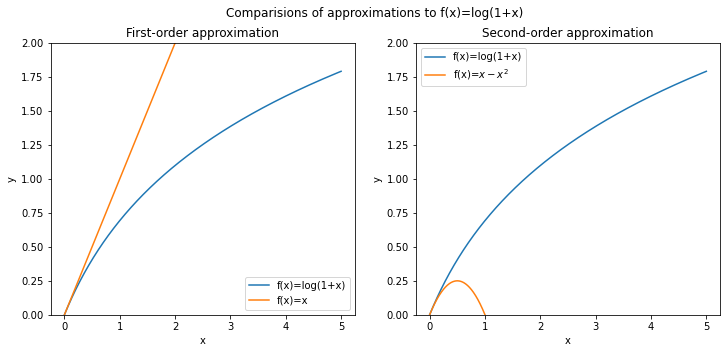

In [20]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,5,1000)
y = np.log(1+x)
y1 = x-x**2

fig,(ax1, ax2) = plt.subplots(1, 2,figsize=(12,5))
fig.suptitle('Comparisions of approximations to f(x)=log(1+x)')
ax1.plot(x, y,label='f(x)=log(1+x)')
ax1.plot(x,x, label = 'f(x)=x')
ax1.set_xlabel('x')
ax1.set_ylim([0, 2])
ax1.set_ylabel('y')
ax1.set_title("First-order approximation")
ax1.legend()

ax2.plot(x, y, label = 'f(x)=log(1+x)')
ax2.plot(x,y1, label = 'f(x)=$x-x^2$')
ax2.set_xlabel('x')
ax2.set_ylim([0, 2])
ax2.set_ylabel('y')
ax2.set_title("Second-order approximation")
ax2.legend()
plt.show()